<a href="https://colab.research.google.com/github/BilalR4M/dl_lab5/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 - Implement a Simple RNN to Predict the Next Value in a Small Sequence of Numbers**

***Read the following descriptions and instructions***

In time-series analysis, predicting future values based on past observations is a fundamental task. Recurrent Neural Networks (RNNs) are particularly well-suited for this type of problem due to their ability to maintain a memory of previous inputs through their recurrent connections.

In this task, you will work with a synthetic dataset that represents a simple sine wave. The sine wave is a periodic function and serves as a good example to understand how RNNs can capture patterns and make predictions.

A **sine wave** is a fundamental waveform that is widely used in various fields, including signal processing, physics, and time-series analysis. It is characterized by its smooth, periodic oscillations, making it an ideal example for understanding time-series prediction tasks.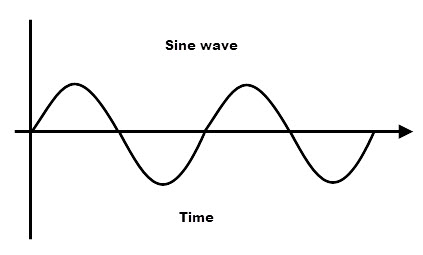

In [368]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

The generate_sine_wave function generates a synthetic sine wave dataset, which is often used in time-series prediction tasks, particularly for training models like RNNs and LSTMs.


**seq_length=100**: This parameter is intended to specify the length of the sequence that you want to generate

**num_samples=1000**:This parameter determines the number of data points (samples) to generate for the sine wave.

In [369]:
# 1. Generate a Synthetic Sine Wave Dataset
def generate_sine_wave(seq_length=100, num_samples=1000):
    x = np.linspace(0, 50, num_samples)
    y = np.sin(x)
    return y


The create_dataset function prepares the sine wave data for use in an RNN by converting the continuous data into sequences that the RNN can learn from. The time_step parameter in the create_dataset function represents the number of previous time points (or observations) that are used as input to predict the next time point in a sequence.

In [370]:
# 2. Prepare the Dataset for RNN
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

To prepare the data for modeling, it is important to normalize it so that all values fall within a specific range, typically between 0 and 1. This step improves the performance and convergence of neural network models.

The MinMaxScaler from sklearn.preprocessing is used for this purpose. It scales the data such that the minimum value of the data becomes 0 and the maximum value becomes 1.

The sine wave data is reshaped into a 2D array (-1, 1) to fit the scaler, as it expects a 2D input. After scaling, the data is reshaped back into its original 1D form.


In [371]:
# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

In [372]:
# Create the Dataset
time_step = 10  # Time steps for RNN input
X, y = create_dataset(data, time_step)

In [373]:
# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


This division of data helps in evaluating the model’s performance by training it on a substantial portion of the data and testing its predictions on unseen data.

In [374]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


***Modify the units parameter in the SimpleRNN layer to see how the number of hidden units affects the model's ability to learn the sequence.***


**optimizer='adam':** Uses the Adam optimizer, which is a popular choice for training deep learning models due to its adaptive learning rate.


**loss='mean_squared_error':** Sets the loss function to mean squared error (MSE), which is commonly used for regression tasks to measure the average squared difference between predicted and actual values.

In [375]:
# 3. Define the RNN Model
model = Sequential()
model.add(SimpleRNN(units=40, return_sequences=False, input_shape=(time_step, 1)))  # <-- Tune 'units'
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Adjust the epochs and batch_size during the training phase to optimize the model's learning process and performance.***

an

**epochs=20:** Specifies the number of times the entire training dataset will pass through the model.


**batch_size=32:** Determines the number of samples per gradient update.

**verbose=1:** Provides detailed output during training, including the progress of each epoch and loss values.

In [376]:
# 4. Train the Model
model.fit(X_train, y_train, epochs=25, batch_size=30, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0160
Epoch 2/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 3/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5518e-04
Epoch 4/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4328e-04
Epoch 5/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4348e-04
Epoch 6/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9591e-04
Epoch 7/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9773e-04
Epoch 8/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4285e-04
Epoch 9/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5540e-04
Epoch 10/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8716e-04
Epoch 11/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.2968e-05
Epoch 12/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2409e-04
Epoch 13/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3957e-04
Epoch 14/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2042e-05
Epoch 15/25
27/27 ━━━━━━━━━━━━━━━━━━━

In [377]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


These steps reverse the normalization applied earlier to the predictions and actual values. Normalization scales the data to a range, typically [0, 1], which helps with model training but makes the results difficult to interpret directly.
By applying the inverse transformation, you convert the scaled predictions (y_pred) and test values (y_test) back to their original scale, allowing you to evaluate and visualize the model's performance in the context of the original data values.

In [378]:
# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

This plot visually compares the actual sine wave values (y_test) with the values predicted by the RNN model (y_pred).

By plotting both sets of values on the same graph, you can easily see how well the model's predictions align with the actual data.

This visualization helps in assessing the performance of the RNN model and understanding how accurately it captures the underlying pattern in the time series data.

***Analyze the resulting plot. If the predicted values deviate significantly from the actual values, experiment with different model configurations and training parameters to improve accuracy.***
  
# **Describe your observations. You can add a text cell and type your observations.**

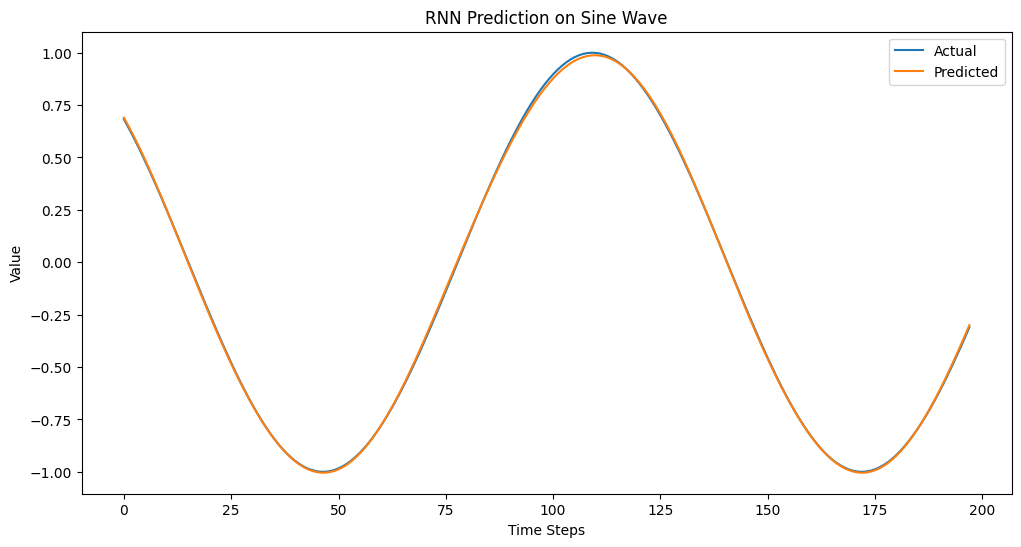

In [379]:

# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()

## Observations

Describe your observations here, focusing on:

*   How well the predicted sine wave matches the actual sine wave in the plot.
*   How changing the `units` in the `SimpleRNN` layer affected the predictions.
*   How changing the `epochs` and `batch_size` during training affected the predictions.
*   How these parameters relate to each other and how tuning them collectively influences the model's ability to predict the sine wave accurately.

## Expected Output When Changing Variables

Here's a description of how changing the `units`, `epochs`, and `batch_size` is expected to affect the model's predictions and the resulting plot:

*   **Increasing `units` in the `SimpleRNN` layer:**
    *   **Effect on Model:** Increasing the number of units provides the RNN with more capacity to learn complex patterns in the data. With more units, the model can potentially capture more intricate relationships within the sine wave sequence.
    *   **Effect on Plot:** You would generally expect the predicted sine wave to more closely align with the actual sine wave. The model should be better at capturing the nuances of the wave's shape and amplitude. However, too many units can lead to overfitting, where the model performs very well on the training data but poorly on unseen test data.
*   **Decreasing `units` in the `SimpleRNN` layer:**
    *   **Effect on Model:** Decreasing the number of units reduces the model's capacity. It might struggle to learn the underlying pattern of the sine wave effectively.
    *   **Effect on Plot:** The predicted sine wave is likely to deviate more significantly from the actual sine wave. The predictions might be smoother or fail to capture the peaks and troughs accurately. The model might underfit the data.
*   **Increasing `epochs` during training:**
    *   **Effect on Model:** Training for more epochs allows the model to iterate over the training data more times. This gives the model more opportunities to adjust its weights and biases to minimize the loss function.
    *   **Effect on Plot:** With more epochs (up to a certain point), the model's predictions should improve, leading to a better fit to the actual sine wave in the plot. The loss during training should decrease. However, training for too many epochs can also lead to overfitting.
*   **Decreasing `epochs` during training:**
    *   **Effect on Model:** Training for fewer epochs means the model has less time to learn from the data. It might not converge to an optimal solution.
    *   **Effect on Plot:** The predicted sine wave is likely to be less accurate and might not follow the actual sine wave closely. The model might underfit the data.
*   **Increasing `batch_size` during training:**
    *   **Effect on Model:** Increasing the batch size means the model updates its weights less frequently, as it processes more samples before each update. Larger batch sizes can provide a more stable gradient, potentially leading to faster convergence on simpler landscapes. However, it can also lead to the model getting stuck in local minima and might require more memory.
    *   **Effect on Plot:** The effect on the plot can be less direct than changing units or epochs. A larger batch size might result in a slightly smoother or less erratic prediction curve, but the overall accuracy could vary depending on the specific dataset and model architecture.
*   **Decreasing `batch_size` during training:**
    *   **Effect on Model:** Decreasing the batch size means the model updates its weights more frequently. This can introduce more noise into the training process, which can sometimes help the model escape local minima and find a better global minimum. However, very small batch sizes can make training unstable.
    *   **Effect on Plot:** Similar to increasing batch size, the effect on the plot is not always straightforward. Smaller batch sizes might lead to slightly more variability in the prediction curve, but they could also potentially result in a more accurate overall prediction if the training converges well.

## Short Summary for Observations

In summary, tuning the `units`, `epochs`, and `batch_size` is crucial for optimizing the RNN model's performance on this time-series prediction task.

*   **`units`:** Controls the model's capacity to learn complex patterns. Too few units can lead to underfitting, while too many can cause overfitting.
*   **`epochs`:** Determines how many times the model sees the training data. More epochs can improve accuracy up to a point, beyond which overfitting can occur.
*   **`batch_size`:** Influences the training process's stability and convergence. Experimenting with different batch sizes can impact how effectively the model learns the sine wave pattern.

By carefully adjusting these parameters and observing the resulting plot and training loss, you can find a configuration that allows the RNN to accurately predict the next value in the sine wave sequence.